In [19]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS (1).csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
df = pd.read_csv('IRIS.csv')

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.shape

(150, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
print("\nNull Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['species'].value_counts())


Null Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Class Distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


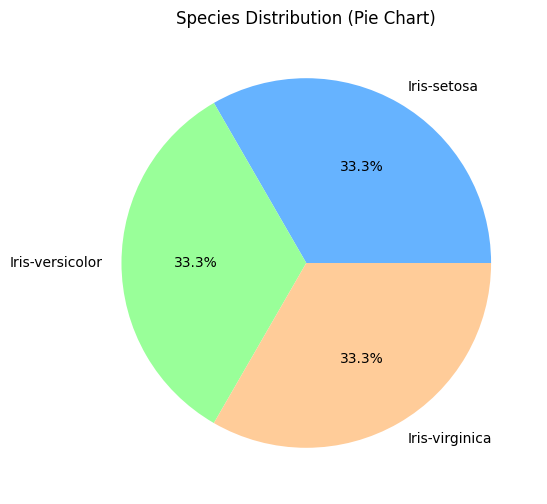

In [29]:
plt.figure(figsize=(6, 6))
df['species'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Species Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

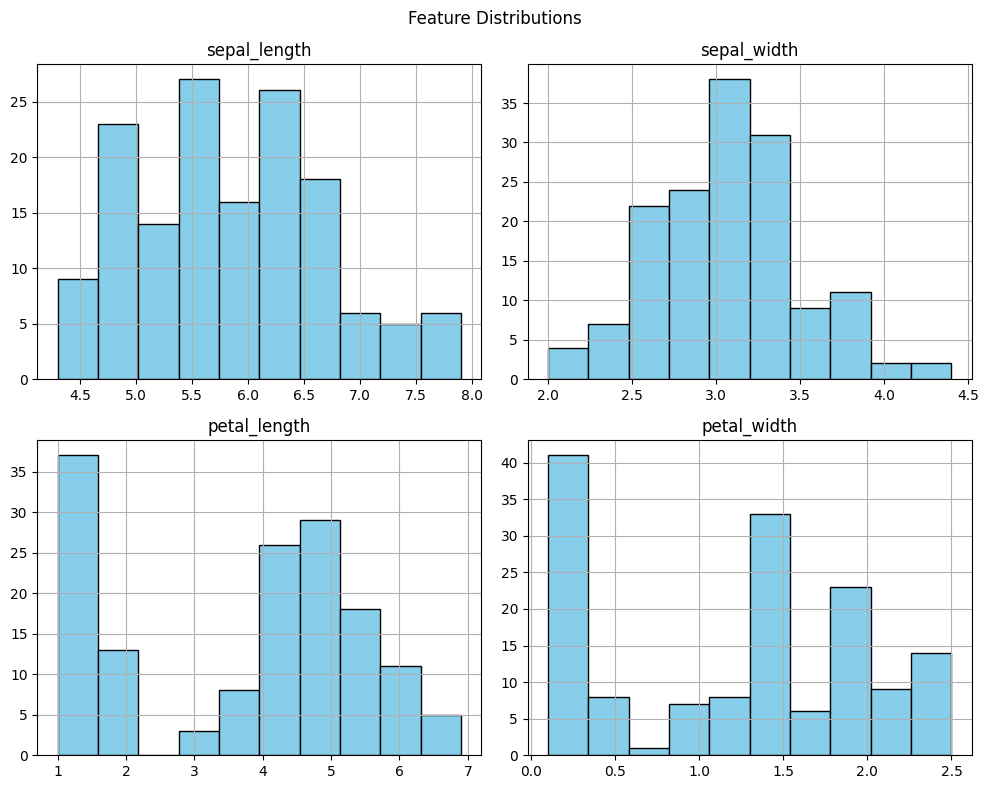

In [30]:
df.hist(figsize=(10, 8), edgecolor='black', color='skyblue')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

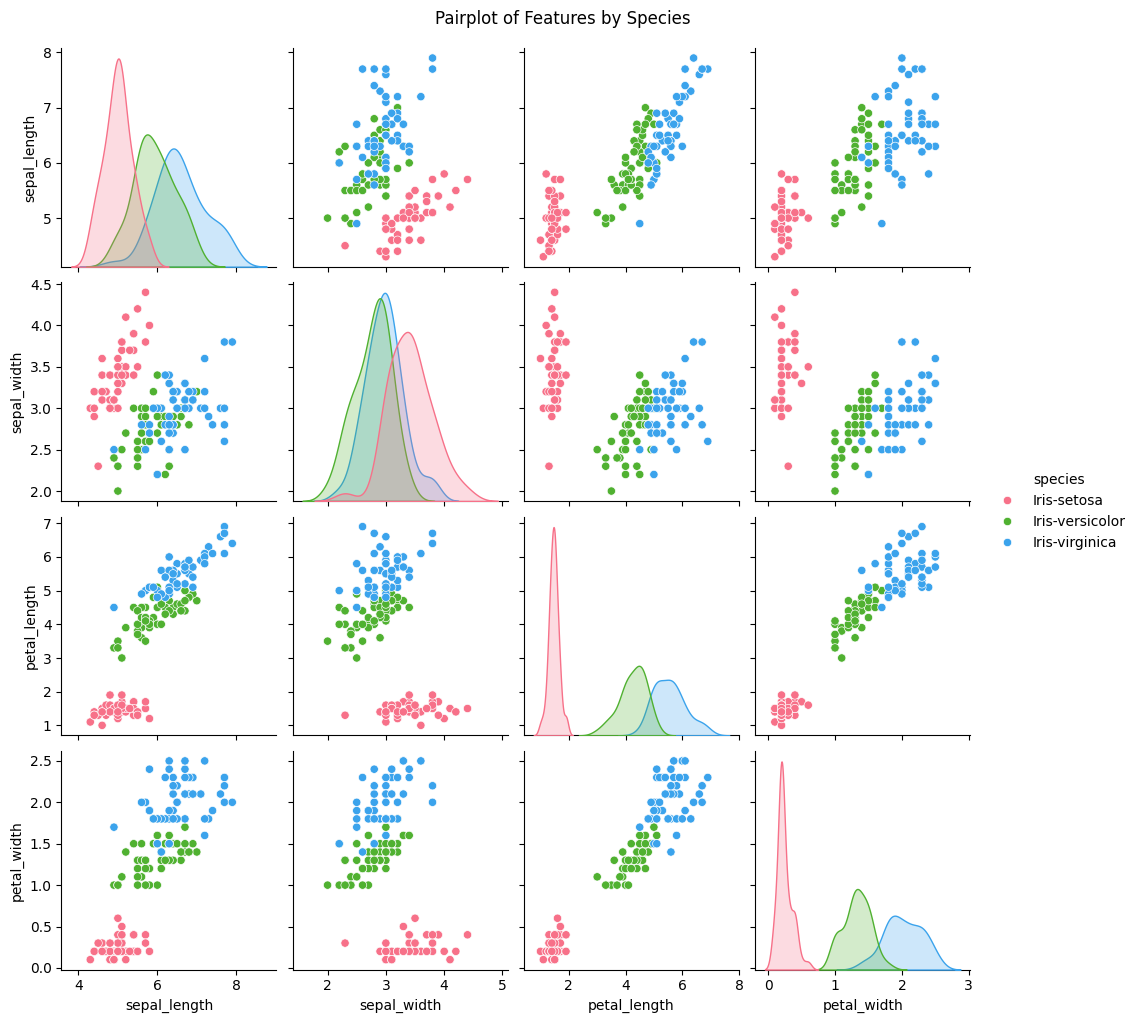

In [31]:
sns.pairplot(df, hue='species', palette='husl')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

In [32]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [33]:
X = df.drop('species', axis=1)
y = df['species']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
rf = RandomForestClassifier()
rf.fit(X_scaled, y)
importances = rf.feature_importances_
features = X.columns

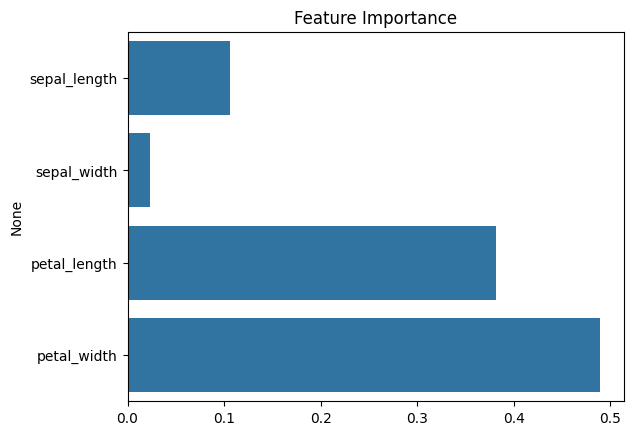

In [36]:
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [40]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


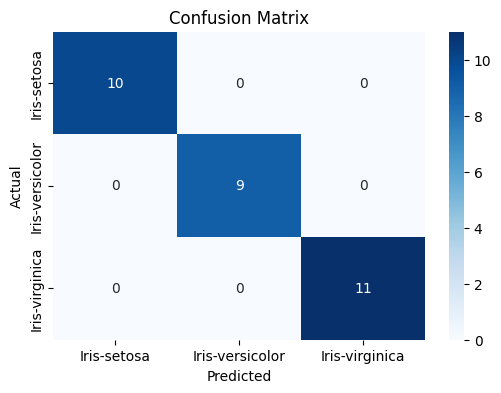

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()